## Activity: Homework 3: Python and Web Scraper
### Name: H. Diana McSpadden
### UID: hdm5s

Determine number of headlines by:
 1. site
 2. date
 3. category
 
Determine if the headline text needs to be cleaned before further analysis

Remove stop words using NLTK library

Perform word frequency analysis of cleaned, non-stop-words words


In [107]:
# import needed libraries 
from numpy import *
import pandas as pd
import nltk
import functools

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords # used for removing stop words
from nltk.probability import FreqDist # used for frequency of words

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('webtext')


[nltk_data] Downloading package stopwords to C:\Users\Diana
[nltk_data]     McSpadden\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Diana
[nltk_data]     McSpadden\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package webtext to C:\Users\Diana
[nltk_data]     McSpadden\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!


True

In [63]:
# read csv file of news headlines from 6 news websites
df = pd.read_csv('newsarticles.csv',header=0,encoding = "ISO-8859-1")

In [64]:
# print the head
df.head()

,site,headline,storyURL,scrapedate,cat
0,abc,Biden legal team preps for November voting fight,https://abcnews.go.com/Politics/biden-campaign...,9/14/2020 19:19,lightblue
1,abc,Wildfires intensify economic pain in the West,https://abcnews.go.com/Business/wireStory/wild...,9/14/2020 19:19,lightblue
2,abc,Victims' names released in attack near Rutgers,https://abcnews.go.com/US/gunmen-sought-deadly...,9/14/2020 19:19,lightblue
3,abc,"3 dead, 3 wounded in violent rampage in Tenn.",https://abcnews.go.com/US/wireStory/officials-...,9/14/2020 19:19,lightblue
4,abc,Feds probing in-custody death of Black man in La.,https://abcnews.go.com/US/wireStory/ap-feds-pr...,9/14/2020 19:19,lightblue


In [65]:
# print the tail
df.tail()

,site,headline,storyURL,scrapedate,cat
1611,reason,['Taghi Amirani: How the U.S.-Backed 1953 Coup...,https://reason.com/podcast/taghi-amirani-how-t...,2020-09-17 08:16:30,lightred
1612,reason,['Homeschooling Hits a Tipping Point'],https://reason.com/2020/09/16/homeschooling-hi...,2020-09-17 08:16:30,lightred
1613,reason,['U.S. Withdraws Foolish Threat of New Tariffs...,https://reason.com/2020/09/16/u-s-withdraws-fo...,2020-09-17 08:16:30,lightred
1614,reason,['New FCC Nominee Has Already Been Helping Tru...,https://reason.com/2020/09/16/new-fcc-nominee-...,2020-09-17 08:16:30,lightred
1615,reason,['Brickbat: Stop Cutting the Cheese'],https://reason.com/2020/09/16/brickbat-stop-cu...,2020-09-17 08:16:30,lightred


In [66]:
# use describe to determine if ther eis any missing data, and basic details of data set
df.describe()

,site,headline,storyURL,scrapedate,cat
count,1616,1616,1616,1616,1616
unique,6,668,650,8,3
top,cbs,['\n Family of Carole Baskin\'s mis...,https://www.cbsnews.com/video/cbsn-originals-p...,2020-09-15 18:01:57,lightblue
freq,1038,13,17,220,1134


From df.describe we learn
1. There are 1616 rows in the dataset
1. There are 5 columns in the dataset
1. Each rows has a value in every column
1. The columns are site, headline, storyURL, scrapedate, and cat
1. site: 6 unique values
1. headline: 668 unique values
1. storyURL: 650 unique values
1. scrapedate: 8 unique values
1. cat: 3 unique values

#### Question 1: Number of Unique Headlines By Site

In [67]:
# Determine number of unique values by site
# groupby site and return number of uniques with nunique()
dfcountsq1 = df.groupby('site').nunique()
dfcountsq1

,headline,storyURL,scrapedate,cat
site,,,,
abc,68,67,8,1
ap,47,39,6,1
cbs,271,271,8,1
fox,176,169,6,1
npr,87,85,8,1
reason,19,19,6,1


This is interesting. It looks like ABC, AP, FOX, and NPR ran at least one storyURL with different headlines.

Was this A/B Testing of headlines?

##### Answer 1:

**ABC**: 68 unique headlines

**AP**: 47 unique headlines

**CBS**: 271 unique headlines

**FOX**: 176 unique headlines

**NPR NEWS**: 87 unique headlines

**REASON**: 19 unique headlines

#### Question 2: Number of Unique Headlines By Date

In [68]:
# Determine number of unique values by date
# groupby scrapedate and return number of uniques with nunique()
dfcountsq2 = df.groupby('scrapedate').nunique()
dfcountsq2

,site,headline,storyURL,cat
scrapedate,,,,
2020-09-15 10:18:17,6,181,178,3
2020-09-15 12:33:31,6,179,176,3
2020-09-15 18:01:57,6,176,173,3
2020-09-16 10:58:13,6,180,179,3
2020-09-16 19:13:38,6,180,180,3
2020-09-17 08:16:30,6,183,178,3
9/14/2020 19:19,3,124,119,2
9/15/2020 7:48,3,135,128,2


The first thing I notice is that there are two different date formats. Let's standardize the date format with a map function on the scrapedate values.

In [69]:
# Standardize the date format to YYYY-mm-DD H:M:S
#df.scrapedate
df['Clean_ScrapeDate']=df.scrapedate.map(lambda x: pd.to_datetime(str(x)).strftime("%Y-%m-%d %H:%M:%S"))
df.head()

dfcountsq2b = df.groupby('Clean_ScrapeDate').nunique()
dfcountsq2b

,site,headline,storyURL,scrapedate,cat
Clean_ScrapeDate,,,,,
2020-09-14 19:19:00,3,124,119,1,2
2020-09-15 07:48:00,3,135,128,1,2
2020-09-15 10:18:17,6,181,178,1,3
2020-09-15 12:33:31,6,179,176,1,3
2020-09-15 18:01:57,6,176,173,1,3
2020-09-16 10:58:13,6,180,179,1,3
2020-09-16 19:13:38,6,180,180,1,3
2020-09-17 08:16:30,6,183,178,1,3


This looks much better. The dates are in the same format, and are now sorted ascending.

##### Answer 2:

**9/14/2020 7:19 pm**: 124 unique headlines

**9/15/2020 7:48 am**: 135 unique headlines

**9/15/2020 10:18 am**: 181 unique headlines

**9/15/2020 12:33 pm**: 179 unique headlines

**9/15/2020 6:01 pm**: 176 unique headlines

**9/16/2020 10:58 am**: 180 unique headlines

**9/16/2020 7:13 pm**: 180 unique headlines

**9/17/2020 8:16 am**: 183 unique headlines

#### Question 3: Number of Unique Headlines by Category

In [70]:
# Determine number of unique values by date
# groupby cat and return number of uniques with nunique()
# return this result sorted Ascending by the headline count
dfcountsq3 = df.groupby('cat').nunique()
dfcountsq3.sort_values(by=['headline'], inplace=True, ascending=True)
dfcountsq3

,site,headline,storyURL,scrapedate,Clean_ScrapeDate
cat,,,,,
center,2,134,124,8,8
lightred,2,195,188,6,6
lightblue,2,339,338,8,8


##### Answer 3:

**center**: 134 unique headlines

**lightred**: 195 unique headlines

**lightblue**: 339 unique headlines
    

#### Question 4: Determine if the headlines require any filtering before we do additional text analysis
Remove Non-alphanumberic characters from headlines. I am willing to loose apostrophes, quotes, emdashes, etc because many will be present in stop words, and I am not performing sentiment analysis which would require the nuance of those non-alphanumeric characters.

In [71]:
# to determine if there are non alpha numeric headlines, 
# create a new column and map a True / False using isalnum()
# to the new column, then I can get a count of number with non alpha numeric characters
df['IsAlphaNum_headline'] = list(map(lambda x: x.isalnum(), df['headline']))

dfcountsq4a = df.groupby('IsAlphaNum_headline').nunique()
dfcountsq4a

,site,headline,storyURL,scrapedate,cat,Clean_ScrapeDate
IsAlphaNum_headline,,,,,,
False,6,668,650,8,3,8


This is **unexpected** at first, but I realize that spaces in the text are cause False, and I do not want to filter spaces from the results.

I will not take the following steps:
1. Create a left and right trimmed headline column
2. filter the lists to remove non alpha numeric characters
3. run the cleaned headlines through a filter to remove "stop words"

In [72]:
df['Trimmed_Headline']=df.headline.map(lambda x: x.strip())

def replaceBadCharacters(inputHeadline):
    # initializing repl_chr 
    replaceWith = ''
    
    # initializing retain chararter 
    charsToFind = ["'",'"',':','\\','[',']','(',')',',','.']
    
    outputHeadline = inputHeadline.translate({ord(i): None for i in charsToFind})
  
    return outputHeadline

  
# using map() to extend logic to each element of list 
df['Cleaned_Trimmed_Headline'] = df.Trimmed_Headline.map(replaceBadCharacters) 

In [73]:
df['Cleaned_Trimmed_Headline'].tail()

1611    Taghi Amirani How the US-Backed 1953 Coup in I...
1612                   Homeschooling Hits a Tipping Point
1613    US Withdraws Foolish Threat of New Tariffs on ...
1614    New FCC Nominee Has Already Been Helping Trump...
1615                     Brickbat Stop Cutting the Cheese
Name: Cleaned_Trimmed_Headline, dtype: object

This looks okay. I think I can run these through a stop words filter. 

In [76]:
# what are the default stopwords?
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

These are all in lowercase, I will need to convert Cleaned_Trimmed_Headline to lowercase to make stop word filtering work the way I intend.

In [80]:
# apply lower map to Cleaned_Trimmed_Headline column
df['Cleaned_Trimmed_Headline'] = df.Cleaned_Trimmed_Headline.map(str.lower) 
df['Cleaned_Trimmed_Headline'].head()

0    biden legal team preps for november voting fight
1       wildfires intensify economic pain in the west
2       victims names released in attack near rutgers
3         3 dead 3 wounded in violent rampage in tenn
4    feds probing in-custody death of black man in la
Name: Cleaned_Trimmed_Headline, dtype: object

In [90]:
# Use the nltk library to split the sentences by words and filter out stop words

# set variable stopWords to the default English stopwords
stopWords = set(stopwords.words('english'))

def removeIfStopWord(listOWords):
    returnedWords = []
    
    for word in listOWords:
        if word not in stopWords:
            returnedWords.append(word)
    
    return returnedWords

# Create a new column in our dataframe for the split version of the sentence
# the splitting is done with the nltk library function word_tokenize()
df['Split_Headline'] = df.Cleaned_Trimmed_Headline.map(word_tokenize) 
df['Split_Headline'].head()





0    [biden, legal, team, preps, for, november, vot...
1    [wildfires, intensify, economic, pain, in, the...
2    [victims, names, released, in, attack, near, r...
3    [3, dead, 3, wounded, in, violent, rampage, in...
4    [feds, probing, in-custody, death, of, black, ...
Name: Split_Headline, dtype: object

In [92]:
# Create New Column of "Real" words in the Split Headline using the removeIfStopWord function

df['Split_Headline_Real'] = df.Split_Headline.map(removeIfStopWord)
df['Split_Headline_Real'].head()

0    [biden, legal, team, preps, november, voting, ...
1         [wildfires, intensify, economic, pain, west]
2    [victims, names, released, attack, near, rutgers]
3        [3, dead, 3, wounded, violent, rampage, tenn]
4    [feds, probing, in-custody, death, black, man,...
Name: Split_Headline_Real, dtype: object

The stop words have been removed.

##### Answer 4a:
I now have a dataframe column called Split_Headline_Real that is cleaned for alpha numeric, and has had stop words removed.

In [104]:
# get a single string of all the headline words
# create a column of the headline words joined
df['Join_Headline_Real'] = df.Split_Headline_Real.map(' '.join)
df['Join_Headline_Real'].head()

0    biden legal team preps november voting fight
1          wildfires intensify economic pain west
2      victims names released attack near rutgers
3           3 dead 3 wounded violent rampage tenn
4      feds probing in-custody death black man la
Name: Join_Headline_Real, dtype: object

#### Question 5: Perform frequency analysis

In [111]:
# create one long string of all the values in the column Join_Headline_Real
# Think we can use reduce to do this
def oneString(x,y):
    return str(x) + ' ' + str(y)

allWords = functools.reduce(oneString, df['Join_Headline_Real'])
allWords

'biden legal team preps november voting fight wildfires intensify economic pain west victims names released attack near rutgers 3 dead 3 wounded violent rampage tenn feds probing in-custody death black man la possible hints life venuss clouds electoral college vs popular vote america south dakota ag involved fatal car accident tear gas used crowd protesting police shooting weekend gun violence chicago leaves 10 dead jailed 37 years man cleared murder rape clerk quits long vote count delays mass woodward addresses criticism shouldve detailed trump interviews earlier possible sign life right next door earth venus hurricane sally predicted bring 110-mph winds gulf coast tuesday wildfires make dangerous air farmworkers like cant breathe protests erupt lancaster pa following officer-involved shooting death least 35 dead wildfires rampage along west coast bit surreal oregons air quality suffers fires complicate covid-19 fight coronavirus affected individual members congress least 25 indian l

In [145]:
# create a function to do the frequency analysis on different strings of words
def doFreqAnalysis(stringOWords, freqToTest):
    
    # Take the complete string of words and turn into a list by splitting on spaces
    wordsAnalysis = nltk.FreqDist(stringOWords.split(' '))
    
    # Because there are so many words, let's find one with frequency greater than 5
    oftenWords = dict([(m, n) for m, n in wordsAnalysis.items() if len(m) > freqToTest])

    # perform the analysis on the oftenly used words
    wordsAnalysis = nltk.FreqDist(oftenWords)

    # plot the frequency of top 25 oftenly used words
    wordsAnalysis.plot(25, cumulative=False)

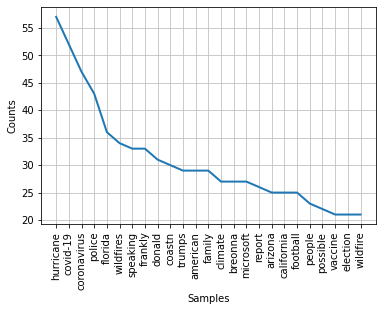

In [147]:

# call the Frequency Analysis on all the non-stop words in headlines with frequency > 5
doFreqAnalysis(allWords,5)


##### Answer 5a: Frequency analysis on all the headlines

In [132]:
print('Looks like the top 10 words, that are not stop words, in the headlines are:\n')
data_analysis.tabulate(10)

Looks like the top 10 words, that are not stop words, in the headlines are:

  hurricane    covid-19 coronavirus      police     florida   wildfires    speaking     frankly      donald      coastn 
         57          52          47          43          36          34          33          33          31          30 


In [ ]:
##### Question 5b: Frequency analysis on only cat = 'center' headlines

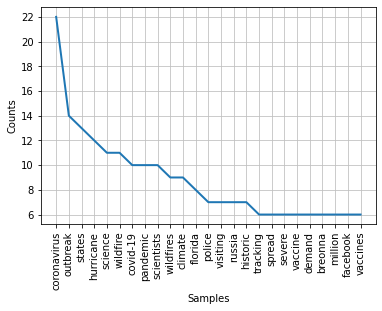

In [148]:
# get a dataframe of only the center headlines
dfCenter = df[df['cat'].str.contains('center')]
#dfCenter.head()

# get all the words in the center headlines
allWordsCenter = functools.reduce(oneString, dfCenter['Join_Headline_Real'])
#allWordsCenter

# call the Frequency Analysis on all the non-stop words in headlines with cat = 'center' with frequency > 5
doFreqAnalysis(allWordsCenter,5)


##### Question 5c: Perform frequency analysis of headlines cat = lightblue

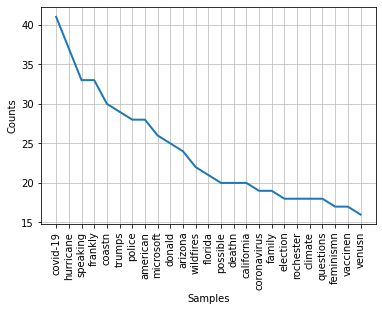

In [149]:
# get a dataframe of only the lightblue headlines
dfBlue = df[df['cat'].str.contains('lightblue')]

# get all the words in the center headlines
allWordsBlue = functools.reduce(oneString, dfBlue['Join_Headline_Real'])

# call the Frequency Analysis on all the non-stop words in headlines with cat = 'lightblue' with frequency > 5
doFreqAnalysis(allWordsBlue,5)

##### Question 5c: Perform frequency analysis of headlines cat = lightred

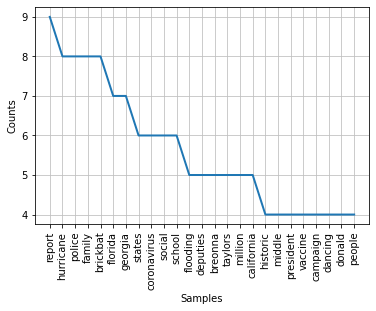

In [150]:
# get a dataframe of only the lightred headlines
dfRed= df[df['cat'].str.contains('lightred')]

# get all the words in the center headlines
allWordsRed = functools.reduce(oneString, dfRed['Join_Headline_Real'])

# call the Frequency Analysis on all the non-stop words in headlines with cat = 'lightred' with frequency > 5
doFreqAnalysis(allWordsRed,5)